# Ehsan Shaghaei

B19-AAI01

e.shaghaei@innopolis.university

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
pd.options.mode.chained_assignment = None
from google.colab import drive
drive.mount('/content/drive')
!pwd
%cd /content/drive/MyDrive/A2dataset/
!ls

Mounted at /content/drive
/content
/content/drive/MyDrive/A2dataset
android_traffic.csv  images  labels  processed-celeba-small.zip


# 1 Theoretical Task on K-means Clustering
[Solution](A2.pdf)

# 2 Theoretical question on SVM
[Solution](A2.pdf)

# 3 Practical Tasks on Ensemble Learning

## 3.1 Read data in Python.  Split your data into train and test sets (80% and 20% respectively).

Importing libraries and loading data

In [ ]:
# importing data frames
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
pd.options.mode.chained_assignment = None
android_traffic = pd.read_csv('./android_traffic.csv')
display(android_traffic.head())
display(android_traffic.describe())

tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
0           36              6             3          3911            0   
1          117              0             9         23514            0   
2          196              0             6         24151            0   
3            6              0             1           889            0   
4            6              0             1           882            0   

   source_app_packets  remote_app_packets  source_app_bytes  remote_app_bytes  \
0                  39                  33              5100              4140   
1                 128                 107             26248             24358   
2                 205                 214            163887             24867   
3                   7                   6               819               975   
4                   7                   6               819               968   

   source_app_packets.1  dns_query_times    type  
0                    39                3  benign  
1                   128               11  benign  
2                   205                9  benign  
3                     7                1  benign  
4                     7                1  benign

tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
count   7845.000000    7845.000000   7845.000000  7.845000e+03  7845.000000   
mean     147.578713       7.738177      2.748502  1.654375e+04     0.056724   
std      777.920084      51.654222      2.923005  8.225650e+04     1.394046   
min        0.000000       0.000000      0.000000  0.000000e+00     0.000000   
25%        6.000000       0.000000      1.000000  8.880000e+02     0.000000   
50%       25.000000       0.000000      2.000000  3.509000e+03     0.000000   
75%       93.000000       0.000000      4.000000  1.218900e+04     0.000000   
max    37143.000000    2167.000000     43.000000  4.226790e+06    65.000000   

       source_app_packets  remote_app_packets  source_app_bytes  \
count         7845.000000         7845.000000      7.845000e+03   
mean           152.911918          194.706310      2.024967e+05   
std            779.034618         1068.112696      1.401076e+06   
min              1.000000            0.000000      0.000000e+00   
25%              7.000000            7.000000      9.340000e+02   
50%             30.000000           24.000000      4.090000e+03   
75%             98.000000           92.000000      2.624400e+04   
max          37150.000000        45928.000000      6.823516e+07   

       remote_app_bytes  source_app_packets.1  dns_query_times  
count      7.845000e+03           7845.000000      7845.000000  
mean       1.692260e+04            152.911918         4.898917  
std        8.238182e+04            779.034618        18.900478  
min        6.900000e+01              1.000000         0.000000  
25%        1.046000e+03              7.000000         1.000000  
50%        3.803000e+03             30.000000         3.000000  
75%        1.261000e+04             98.000000         5.000000  
max        4.227323e+06          37150.000000       913.000000

Checking categorical features and data types

In [ ]:
types = android_traffic.dtypes
print("\033[1;32;49mNumber categorical features in Truth:", sum(types=='object'))
display(types)

Number categorical features in Truth: 1


tcp_packets              int64
dist_port_tcp            int64
external_ips             int64
vulume_bytes             int64
udp_packets              int64
source_app_packets       int64
remote_app_packets       int64
source_app_bytes         int64
remote_app_bytes         int64
source_app_packets.1     int64
dns_query_times          int64
type                    object
dtype: object

> Here we conclude the column ```type``` is a categorical feature. Since the column is not a predictor and the classification is binary, lable encoding techniqe may be applied

Getting list of labels in column ```type```

In [ ]:
labels = set()
for t in android_traffic.type:
    labels.add(t)
labels = list(labels)
display("Labels in column `type` are "+ str(labels))

"Labels in column `type` are ['malicious', 'benign']"

Encoding the dataframe

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_at = LabelEncoder()    # >> at << stands for android traffic :) 
le_at.fit(labels)
android_traffic.type = le_at.transform(android_traffic.type)
display(
    pd.DataFrame(le_at.inverse_transform(android_traffic.type)), # column before encoding Versus 
    pd.DataFrame(android_traffic.type))                          # column after  encoding


0
0        benign
1        benign
2        benign
3        benign
4        benign
...         ...
7840  malicious
7841  malicious
7842  malicious
7843  malicious
7844  malicious

[7845 rows x 1 columns]

type
0        0
1        0
2        0
3        0
4        0
...    ...
7840     1
7841     1
7842     1
7843     1
7844     1

[7845 rows x 1 columns]

Spliting Data (```Train 80% , Test 20%```)

In [ ]:
from sklearn.model_selection import train_test_split

X_at = android_traffic.iloc[:,:-1]
y_at = android_traffic.iloc[:,-1]

x_train_at, x_test_at, y_train_at, y_test_at = train_test_split(X_at,y_at,test_size=0.2,random_state=0,stratify=y_at)



## 3.2  Create the following three models: 
``` python
RandomForestClassifier(maxdepth=15)
BaggingClassifier(baseestimator=DecisionTreeClassifier(maxdepth=15))
AdaBoostClassifier(baseestimator=DecisionTreeClassifier(maxdepth=15))
```

Create and train and testing initial model

               precision    recall  f1-score   support

           0       0.90      0.92      0.91       941
           1       0.88      0.84      0.86       628

    accuracy                           0.89      1569
   macro avg       0.89      0.88      0.88      1569
weighted avg       0.89      0.89      0.89      1569
 		 Random Forest Classifier Reports
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       941
           1       0.85      0.85      0.85       628

    accuracy                           0.88      1569
   macro avg       0.87      0.88      0.87      1569
weighted avg       0.88      0.88      0.88      1569
 		 Bagging Classifier Reports
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       941
           1       0.88      0.87      0.87       628

    accuracy                           0.90      1569
   macro avg       0.90      0.89      0.90      1569
weigh

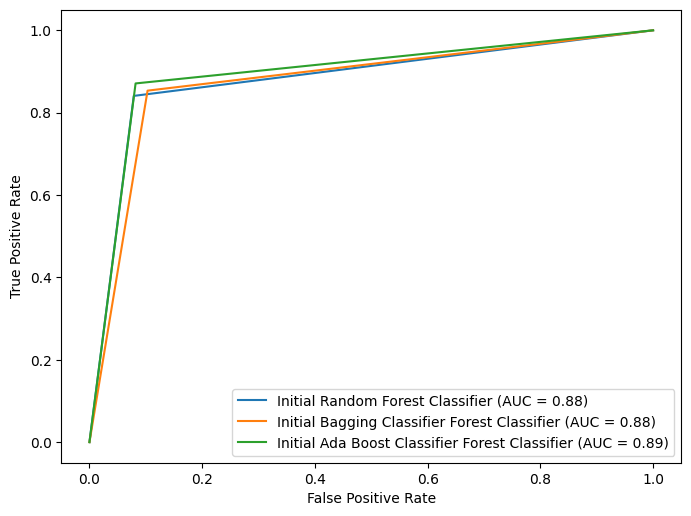

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,roc_curve,auc
from sklearn.metrics import RocCurveDisplay

# Creating models
rfc_at = RandomForestClassifier(max_depth=15)
bc_at = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))
adaboostc_at = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))
# Training Models
rfc_at.fit(x_train_at,y_train_at)
bc_at.fit(x_train_at,y_train_at)
adaboostc_at.fit(x_train_at,y_train_at)
# Test and evaluation of the model
y_pred_rfc_at = rfc_at.predict(x_test_at)
y_pred_bc_at = bc_at.predict(x_test_at)
y_pred_adaboostc_at = adaboostc_at.predict(x_test_at)
# Models report

# Printing model metrics
print("\033[1;33;49m",classification_report(y_test_at,y_pred_rfc_at),"\t\t Random Forest Classifier Reports")
print("\033[1;32;49m",classification_report(y_test_at,y_pred_bc_at), "\t\t Bagging Classifier Reports")
print("\033[1;34;49m",classification_report(y_test_at,y_pred_adaboostc_at),"\t\t Ada Boost Classifier Reports")

# Ploting ROC curve and AUC
plt.figure(figsize=(8,6),dpi=100)
ax = plt.gca()

fpr, tpr, thresholds = roc_curve(y_test_at, y_pred_rfc_at)
roc_auc = auc(fpr, tpr)
cur = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                          estimator_name='Initial Random Forest Classifier')
cur.plot(ax=ax)

fpr, tpr, thresholds = roc_curve(y_test_at, y_pred_bc_at)
roc_auc = auc(fpr, tpr)
cur = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                          estimator_name='Initial Bagging Classifier Forest Classifier')
cur.plot(ax=ax)

fpr, tpr, thresholds = roc_curve(y_test_at, y_pred_adaboostc_at)
roc_auc = auc(fpr, tpr)
cur = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                          estimator_name='Initial Ada Boost Classifier Forest Classifier')
cur.plot(ax=ax)

plt.show()

This Report Concludes that *initially* the model performance are as following regarding their accuracy and AUC
1. Ada Boost Classifier
2. Random Forest Classifier
3. Bagging Classifier 

## 3.3 Tuning the following hyper-parameters of the estimators in all ensemble models using grid search:
* ```nestimators```
* ```maxfeatures``` −→ for the base estimators
* ```minimpuritydecrease``` −→ for the base estimators

The GridSearchCV is based on ``` accuracy ``` score of the models using 5-fold cross validation and results are as following:

In [ ]:
from sklearn.model_selection import GridSearchCV
scoring = 'accuracy'
cv = 5


In [ ]:
param_grid = {
'n_estimators': [30, 40, 50, 60, 70],
'max_features':  ['log2', 'sqrt'],
'min_impurity_decrease': np.logspace(-6, -9, num=13)
}
result_tuned_rfc = GridSearchCV(estimator=rfc_at,param_grid=param_grid,scoring=scoring,cv=cv,verbose=-1)
result_tuned_rfc.fit(x_train_at,y_train_at)
print("\033[1;33;49m Best Hyperparameter Random Forest Classifier \n Parameters:",result_tuned_rfc.best_params_,'\n Score:',result_tuned_rfc.best_score_,'\n Index:',result_tuned_rfc.best_index_)

 Best Hyperparameter Random Forest Classifier 
 Parameters: {'max_features': 'sqrt', 'min_impurity_decrease': 1e-08, 'n_estimators': 50} 
 Score: 0.8964298221128224 
 Index: 107


In [ ]:
param_grid = {
'n_estimators': [30, 40, 50, 60, 70],
'base_estimator__max_features':  ['log2', 'sqrt'],
'base_estimator__min_impurity_decrease': np.logspace(-6, -9, num=13)
}
result_tuned_bc = GridSearchCV(estimator=bc_at,param_grid=param_grid,scoring=scoring,cv=cv,verbose=-1)
result_tuned_bc.fit(x_train_at,y_train_at)
print("\033[1;32;49m Best Hyperparameter Bagging  Classifier \n Parameters:",result_tuned_bc.best_params_,'\n Score:',result_tuned_bc.best_score_,'\n Index:',result_tuned_bc.best_index_)

 Best Hyperparameter Bagging  Classifier 
 Parameters: {'base_estimator__max_features': 'log2', 'base_estimator__min_impurity_decrease': 3.162277660168379e-07, 'n_estimators': 50} 
 Score: 0.8964296952318117 
 Index: 12


In [ ]:
param_grid = {
'n_estimators': [30, 40, 50, 60, 70],
'base_estimator__max_features':  ['log2', 'sqrt'],
'base_estimator__min_impurity_decrease': np.logspace(-6, -9, num=13)
}
result_tuned_adaboostc = GridSearchCV(estimator=adaboostc_at,param_grid=param_grid,scoring=scoring,cv=cv,verbose=-1)
result_tuned_adaboostc.fit(x_train_at,y_train_at)
print("\033[1;34;49m Best Hyperparameter Tuned Ada Boost Classifier \n Parameters:",result_tuned_adaboostc.best_params_,'\n Score:',result_tuned_adaboostc.best_score_,'\n Index:',result_tuned_adaboostc.best_index_)

 Best Hyperparameter Tuned Ada Boost Classifier 
 Parameters: {'base_estimator__max_features': 'log2', 'base_estimator__min_impurity_decrease': 3.162277660168379e-08, 'n_estimators': 70} 
 Score: 0.8792229806887102 
 Index: 34


Create the final models using the best values of the hyper-parameters and evaluating the models on the test set.  Which modelperformed the best on the test set?  Why do you think that is the case?

SORTED ACCURACY {'bc': 0.8865519439133206, 'rfc': 0.8846398980242193, 'adaboost': 0.8706182281708095}
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       941
           1       0.87      0.84      0.85       628

    accuracy                           0.88      1569
   macro avg       0.88      0.88      0.88      1569
weighted avg       0.88      0.88      0.88      1569
 		 Random Forest Classifier Reports 	 accuracy=
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       941
           1       0.87      0.84      0.86       628

    accuracy                           0.89      1569
   macro avg       0.88      0.88      0.88      1569
weighted avg       0.89      0.89      0.89      1569
 		 Bagging Classifier Reports 	 accuracy=
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       941
           1       0.83      0.85      0.8

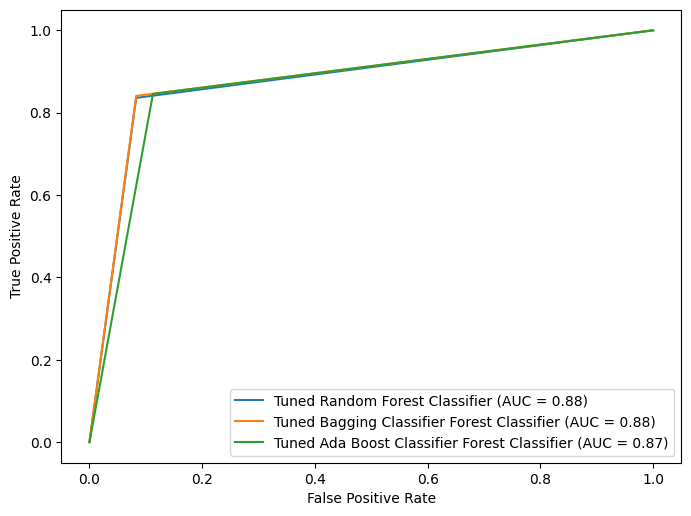

In [ ]:
# Creating models
from sklearn.metrics import accuracy_score

tuned_rfc_at = RandomForestClassifier(
    max_features=result_tuned_rfc.best_params_['max_features'], min_impurity_decrease=result_tuned_rfc.best_params_['min_impurity_decrease'], n_estimators=result_tuned_rfc.best_params_['n_estimators'], max_depth=15)

tuned_bc_at = BaggingClassifier(base_estimator=DecisionTreeClassifier(
    max_features=result_tuned_bc.best_params_['base_estimator__max_features'], min_impurity_decrease=result_tuned_bc.best_params_['base_estimator__min_impurity_decrease'], max_depth=15), n_estimators=result_tuned_bc.best_params_['n_estimators'])

tuned_adaboostc_at = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(
    max_features=result_tuned_adaboostc.best_params_['base_estimator__max_features'], min_impurity_decrease=result_tuned_adaboostc.best_params_['base_estimator__min_impurity_decrease'], max_depth=15), n_estimators=result_tuned_adaboostc.best_params_['n_estimators'])
# Training Models
tuned_rfc_at.fit(x_train_at, y_train_at)
tuned_bc_at.fit(x_train_at, y_train_at)
tuned_adaboostc_at.fit(x_train_at, y_train_at)
# Test and evaluation of the model
y_pred_tuned_rfc_at = tuned_rfc_at.predict(x_test_at)
y_pred_tuned_bc_at = tuned_bc_at.predict(x_test_at)
y_pred_tuned_adaboostc_at = tuned_adaboostc_at.predict(x_test_at)
# Models report
accuracy = {}
# Printing model metrics
accuracy['rfc'] = accuracy_score(y_test_at, y_pred_tuned_rfc_at)
accuracy['bc'] = accuracy_score(y_test_at, y_pred_tuned_bc_at)
accuracy['adaboost'] = accuracy_score(y_test_at, y_pred_tuned_adaboostc_at)
accuracy = {k: v for k, v in sorted(
    accuracy.items(), key=lambda item: item[1], reverse=True)}  # Sort by accuracy
print('SORTED ACCURACY',accuracy)
print("\033[1;33;49m", classification_report(
    y_test_at, y_pred_tuned_rfc_at), "\t\t Random Forest Classifier Reports \t accuracy=",)
print("\033[1;32;49m", classification_report(
    y_test_at, y_pred_tuned_bc_at), "\t\t Bagging Classifier Reports \t accuracy=",)
print("\033[1;34;49m", classification_report(
    y_test_at, y_pred_tuned_adaboostc_at), "\t\t Ada Boost Classifier Reports \t accuracy=",)

# Ploting ROC curve and AUC
plt.figure(figsize=(8, 6), dpi=100)
ax = plt.gca()

fpr, tpr, thresholds = roc_curve(y_test_at, y_pred_tuned_rfc_at)
roc_auc = auc(fpr, tpr)
cur = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                      estimator_name='Tuned Random Forest Classifier')
cur.plot(ax=ax)

fpr, tpr, thresholds = roc_curve(y_test_at, y_pred_tuned_bc_at)
roc_auc = auc(fpr, tpr)
cur = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                      estimator_name='Tuned Bagging Classifier Forest Classifier')
cur.plot(ax=ax)

fpr, tpr, thresholds = roc_curve(y_test_at, y_pred_tuned_adaboostc_at)
roc_auc = auc(fpr, tpr)
cur = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                      estimator_name='Tuned Ada Boost Classifier Forest Classifier',)
cur.plot(ax=ax)

plt.show()


Create the final modelsusing the best values of the hyper-parameters and evaluate your models on the test set.  Which modelperformed the best on the test set?  Why do you think that is the case?
> Report above concludes that *after hypertuning* the model performance are as following regarding their accuracy:


In [ ]:
print('| Index |Classifier |\tAccuracy |')
for i,item in enumerate(accuracy.items()):
    print('|',i+1,'\t|',item[0],'\t|',item[1],'|')

print('* Legend:')
print('\t rfc = random forest classifier')
print('\t bc = bagging classifier')
print('\t adaboost = ada boost classifier')

| Index |Classifier |	Accuracy |
| 1 	| bc 	| 0.8865519439133206 |
| 2 	| rfc 	| 0.8846398980242193 |
| 3 	| adaboost 	| 0.8706182281708095 |
* Legend:
	 rfc = random forest classifier
	 bc = bagging classifier
	 adaboost = ada boost classifier


## 3.4 If you fine-tuned the hyper-parameter ```max_depth``` as well, which of the three ensemble models would you expect to have deeper (larger ```max_depth``` value)base learners and which would have shallower base learners?  Why do you think that would be thecase?

Since in **adaboost** the base estimators are build sequentially, we expect it to over fit sooner than bagging and **random forest** which is an extention to **bagging**. we use bagging I guess *Bagging Classifier and Random Forest Classifier* will have a **bigger** max-depth  in comparision to the *ada boost*,since in first two methods *weak learners* have ```equal say``` in comparision to other learners meanwhile in boosting method the *weak learners* have ``` more say``` in making the **final classification**. Besides, I **can not** *confidently* say if* Random Forest Classifier is more likely to have the deeper trees than Bagging Classifier*, because in Random forest classifier, the data subsets are produced randomly and the features to split the data in the base classifier(Decision Tree) is chosen as the randomly meanwhile it's not so in bagging case. Moreover,The deeper the base estimator which is a decision tree would be, the more splits it has and it captures more information about the data, and I predict **all the models would overfits** after some peak of accuracy. 

## 3.5  Initialize the models with the best parameters you got from the third step.  Fine tune ```max_depth``` from 5 to 25.  Draw 3 plots on the same graph.  Put the ```max_depth``` parameter on the horizontal axis and the cross validation accuracy of your ensemble models on the vertical axis.  Do the results agree with your answer in the previous part?


Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START max_depth=5................................................
[CV 1/5; 1/21] END .................max_depth=5;, score=0.748 total time=   0.3s
[CV 2/5; 1/21] START max_depth=5................................................
[CV 2/5; 1/21] END .................max_depth=5;, score=0.751 total time=   0.3s
[CV 3/5; 1/21] START max_depth=5................................................
[CV 3/5; 1/21] END .................max_depth=5;, score=0.758 total time=   0.2s
[CV 4/5; 1/21] START max_depth=5................................................
[CV 4/5; 1/21] END .................max_depth=5;, score=0.758 total time=   0.2s
[CV 5/5; 1/21] START max_depth=5................................................
[CV 5/5; 1/21] END .................max_depth=5;, score=0.762 total time=   0.2s
[CV 1/5; 2/21] START max_depth=6................................................
[CV 1/5; 2/21] END .................max_depth=6

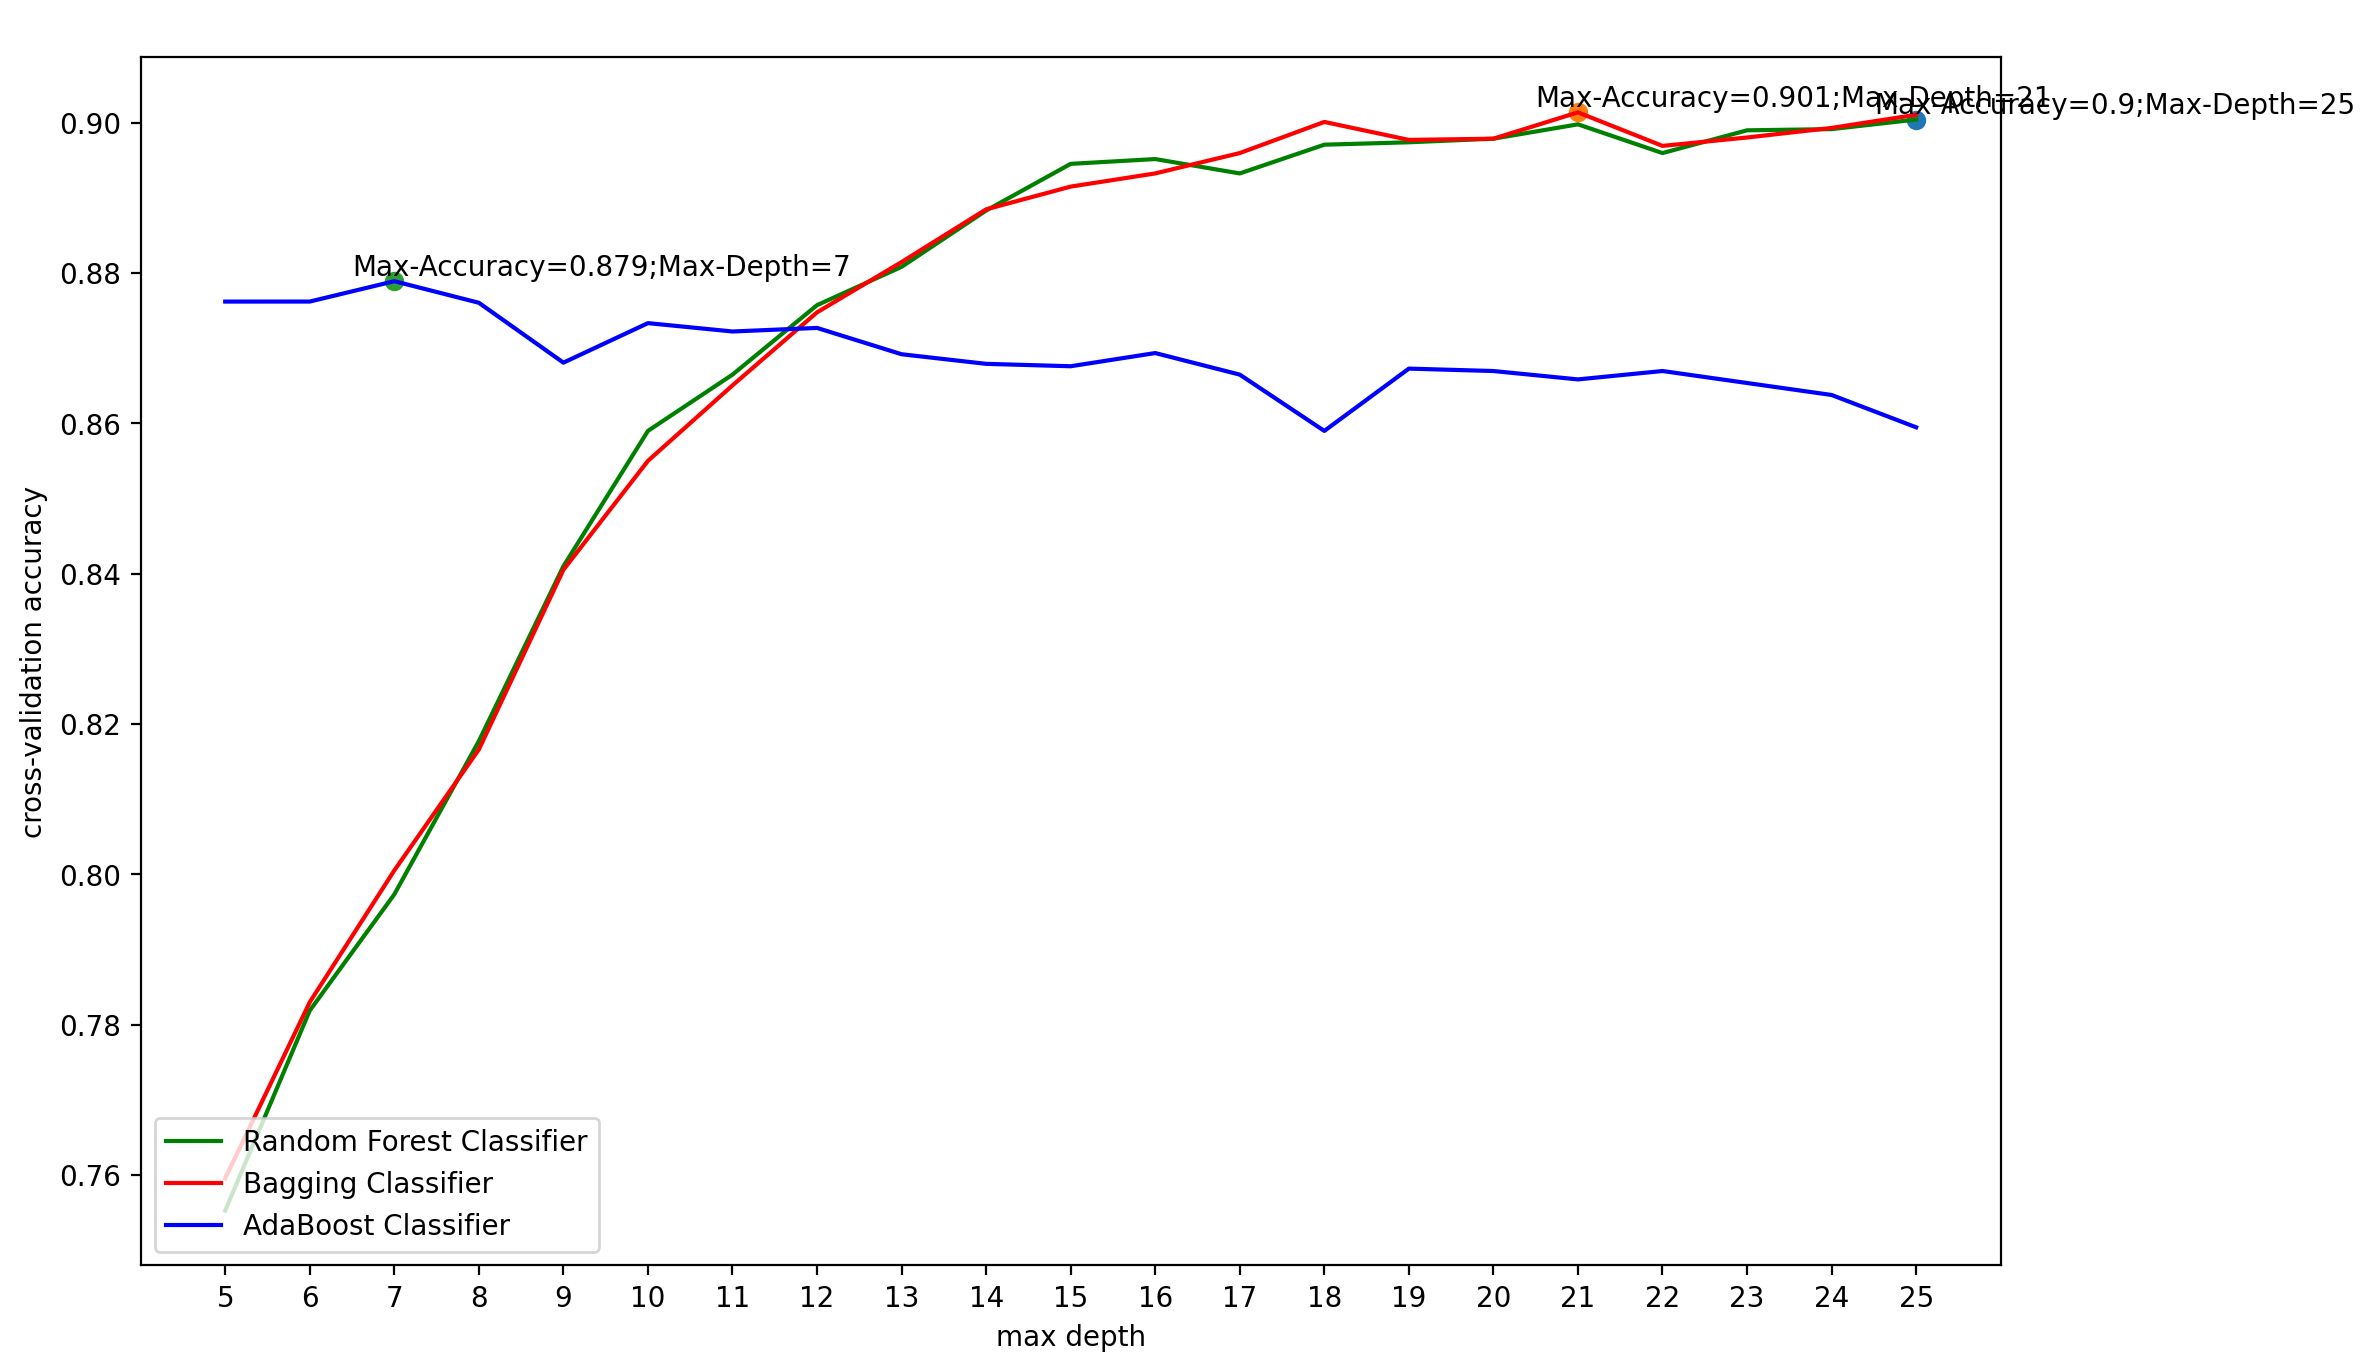

In [ ]:
from sklearn.model_selection import cross_val_score
max_depth_ax = np.arange(5,26)

param_grid = {
    'max_depth': max_depth_ax
}

tuned_rfc_at1 = RandomForestClassifier(
    max_features=result_tuned_rfc.best_params_['max_features'], min_impurity_decrease=result_tuned_rfc.best_params_['min_impurity_decrease'], n_estimators=result_tuned_rfc.best_params_['n_estimators'], max_depth=15)
grid = GridSearchCV(tuned_rfc_at1, param_grid=param_grid, cv=5, verbose=10)
grid_result = grid.fit(x_train_at, y_train_at)
maxdep_scr_rfc = grid.cv_results_['mean_test_score']


param_grid = {
    'base_estimator__max_depth': max_depth_ax
}

tuned_bc_at1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(
    max_features=result_tuned_bc.best_params_['base_estimator__max_features'], min_impurity_decrease=result_tuned_bc.best_params_['base_estimator__min_impurity_decrease'], max_depth=15), n_estimators=result_tuned_bc.best_params_['n_estimators'])
grid = GridSearchCV(tuned_bc_at1, param_grid=param_grid, cv=5, verbose=10)
grid_result = grid.fit(x_train_at, y_train_at)
maxdep_scr_bc = grid.cv_results_['mean_test_score']

tuned_adaboostc_at1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(
    max_features=result_tuned_adaboostc.best_params_['base_estimator__max_features'], min_impurity_decrease=result_tuned_adaboostc.best_params_['base_estimator__min_impurity_decrease'], max_depth=15), n_estimators=result_tuned_adaboostc.best_params_['n_estimators'])
grid = GridSearchCV(tuned_adaboostc_at1, param_grid=param_grid, cv=5, verbose=10)
grid_result = grid.fit(x_train_at, y_train_at)
maxdep_scr_adaboost = grid.cv_results_['mean_test_score']

print(param_grid)

def annot_max(x,y, ax=None,c=''):
    x_max_index = np.argmax(np.array(y))
    x_max = x[x_max_index] 
    y_max = y[x_max_index] 
    print('|',y_max,'\t|',c,'|\t',x_max,'|')
    plt.scatter(x_max,y_max)
    plt.annotate('\n\nMax-Accuracy='+str(round(y_max,3))+';Max-Depth='+str(x_max), xy=(x_max-0.5, y_max+0.0008),)
print('| Accuracy\t\t| Classifier\t\t |\t Max-Depth |')
plt.figure(figsize=(12,8),dpi=200)
ax = plt.gca()
ax.set_xlabel('max depth')
ax.set_ylabel('cross-validation accuracy')
ax.set_xticks(max_depth_ax)
ax.plot(max_depth_ax,maxdep_scr_rfc,c='g',label='Random Forest Classifier')
annot_max(max_depth_ax,maxdep_scr_rfc,ax=ax,c='Random Forest Classifier')
ax.plot(max_depth_ax,maxdep_scr_bc,c='r',label='Bagging Classifier')
annot_max(max_depth_ax,maxdep_scr_bc,ax=ax,c='Bagging Classifier')
ax.plot(max_depth_ax,maxdep_scr_adaboost,c='b',label='AdaBoost Classifier')
annot_max(max_depth_ax,maxdep_scr_adaboost,ax=ax,c='AdaBoost Classifier')
ax.legend(loc='lower left')
plt.show()

According to the result above, *Ada boost* converge to it's best performance at ```max-depth=7```, *Bagging* at ```max-depth=21``` and Random Forest at ```max-depth=25``` which approves my hypothesis about the classifiers base estimators' max-depth.

# 4 Practical Tasks on CNN

## 4.1 Preprocess and visualize the dataset:  [50%]

### 4.1.1
* Download dataset.
* Description of folders and naming are inside dataset folder in README.txt
* Read all images and convert them to gray with (cv2.ctvColor())
* Read annotation for images. It contains eye corners and eye centers of 2 eyes for each image.

In [20]:
import cv2
import os

IMAGE_KEY = 'image'
GRAYSCALE_KEY = 'grayscale'
ANNOTATION_KEY = 'annotation'

# Read all images


def load_images_from_folder(folder, dest):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            if not type(dest.get(filename)) == dict:
                dest[filename] = {}
            dest[filename][IMAGE_KEY] = img

            
# Read annotation for images. It contains eye corners and eye centers of 2 eyes for each image.


def load_labels_from_folder(folder, dest):
    for filename in os.listdir(folder):
        if not filename[:3].isnumeric():
            print('Annotation file ', filename, 'were skipped to be added.')
            continue
        file = open(folder+'/'+filename, 'r')
        label = file.readlines()
        for line in label:
            data = line[:-1].split('\t')
            if not type(dest.get(data[0])) == dict:
                dest[data[0]] = {}
            tmp = []
            for i in range(len(data[1:])//2):
                tmp.append(
                    (int(float(data[1:][2*i])),
                     int(float(data[1:][2*i+1])))
                )

            dest[data[0]][ANNOTATION_KEY] = tmp


IMAGEPATH = './images'
LABELPATH = './labels'
data = {}
load_labels_from_folder(LABELPATH, data)
load_images_from_folder(IMAGEPATH, data)
# Convert them to gray with (cv2.ctvColor())
for value in data.values():
    value[GRAYSCALE_KEY] = cv2.cvtColor(value[IMAGE_KEY], cv2.COLOR_BGR2GRAY)

Annotation file  image_labels.txt were skipped to be added.


### 4.1.2 Visualize one image, draw eye corners and iris centers on it

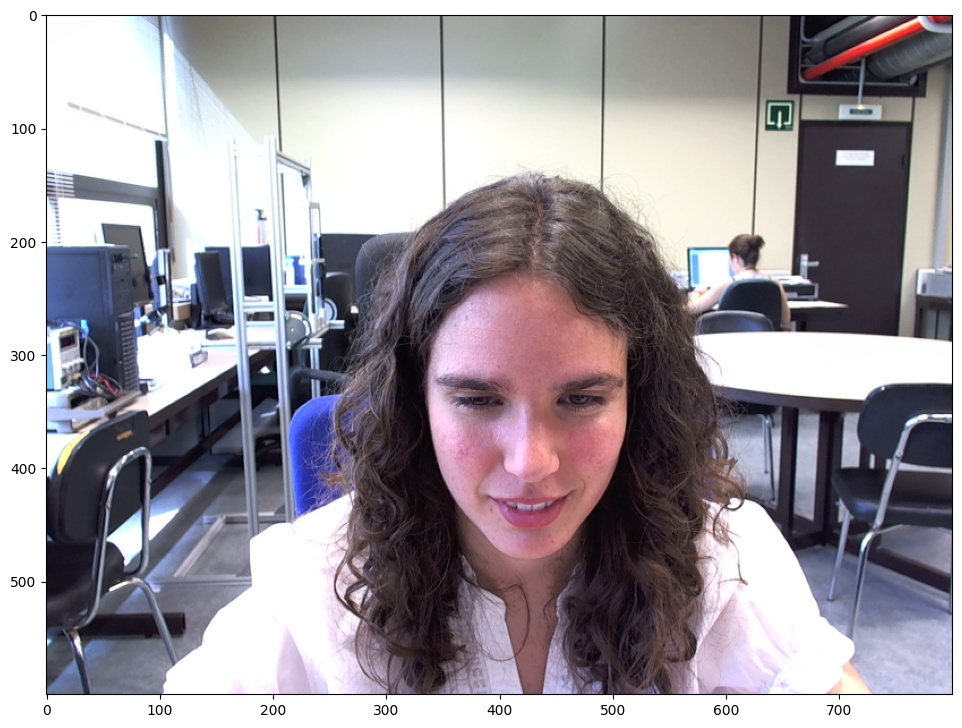

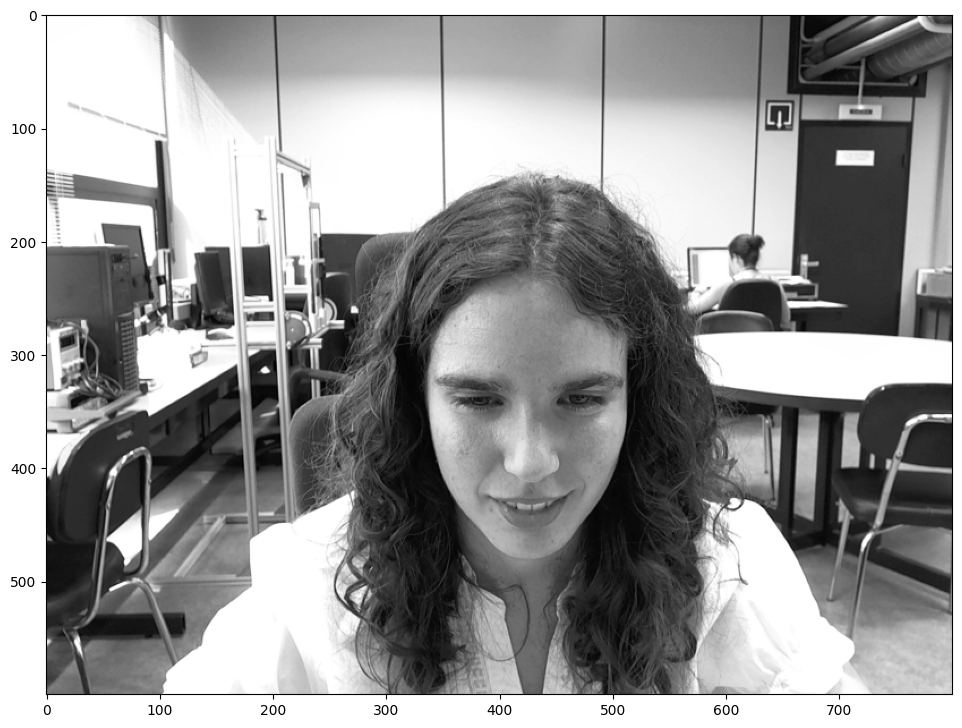

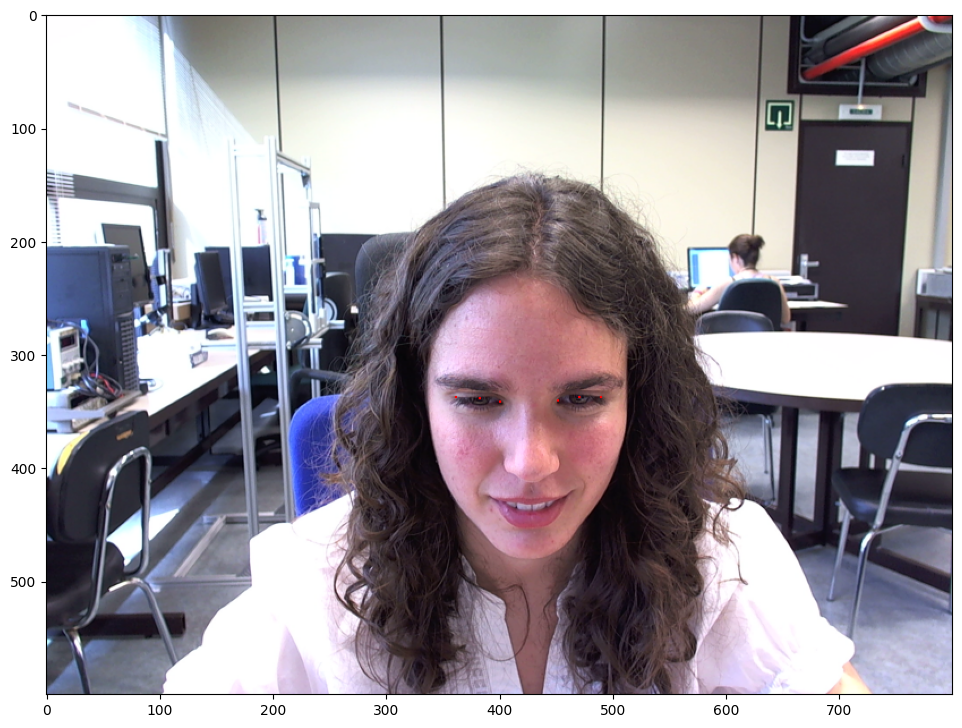

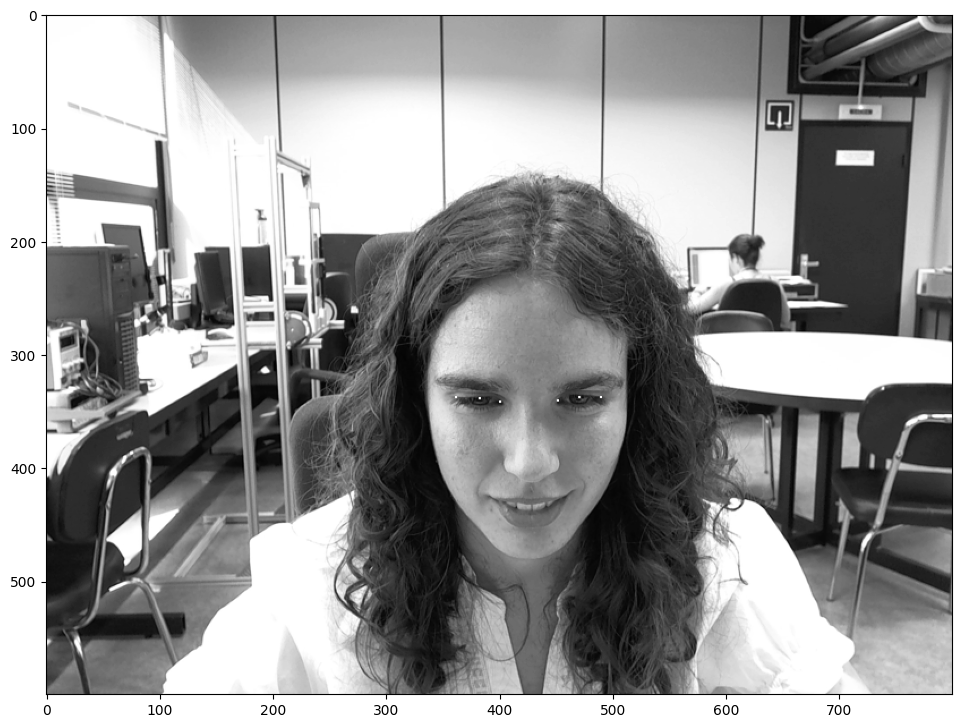

In [21]:
from mpl_toolkits.axes_grid1 import ImageGrid
def plotImages(images_arr,title,size=3):
  fig = plt.figure(figsize=(len(images_arr)*size, size))
  grid = ImageGrid(fig, 111,
                  nrows_ncols=(1,len(images_arr)),
                  axes_pad=0.1, 
                  )
  grid[0].set_title(title)
  for ax, im in zip(grid, images_arr):
      # Iterating over the grid returns the Axes.
      ax.imshow(im,cmap='gray')
      ax.set_axis_off()

  plt.show()
  
def drawRGB_Circle(point, src, color=(0, 0, 255), offset=0):
    if offset == 0:
        src[point[1], point[0]] = color
    else:
        src[point[1]-offset:point[1]+offset,
            point[0]-offset:point[0]+offset] = color


def drawGray_Circle(point, src, color=255, offset=0):
    if offset == 0:
        src[point[1], point[0]] = color
    else:
        src[point[1]-offset:point[1]+offset,
            point[0]-offset:point[0]+offset] = color


for d in data.values():
    # Showing the Original Image
    plt.figure(figsize=(12, 9), dpi=100)
    plt.imshow(cv2.cvtColor(d[IMAGE_KEY], cv2.COLOR_BGR2RGB))
    plt.show()
    # Showing the gray image
    plt.figure(figsize=(12, 9), dpi=100)
    plt.imshow(d[GRAYSCALE_KEY], cmap='gray')
    plt.show()

    # -- Visualize one image, draw eye corners and iris centers on it
    # Annotating the Original Image
    img = d[IMAGE_KEY].copy()
    for annotation in d[ANNOTATION_KEY]:
        drawRGB_Circle(annotation, img, offset=1)
    plt.figure(figsize=(12, 9), dpi=100)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # Annotating the Gray Image
    img = d[GRAYSCALE_KEY].copy()
    for annotation in d[ANNOTATION_KEY]:
        drawGray_Circle(annotation, img, offset=1)
    plt.figure(figsize=(12, 9), dpi=100)
    plt.imshow(img, cmap='gray')
    break

### 4.1.3
* Normalize images (divide by 255)
* Crop eye regions (and resize if needed) to be (48x48) image with the help of eye corners. Do that
for all images.
*Now data is ready to create final dataset, which you will use for CNN training. You should
create two np arrays X and Y:
    * X contains (48x48) images of eye regions which you crop on previous step
    * Your labels (Y) are coordinates of eye center for each image in X (don't forget to convert iris center from whole image coordinate system to coordinate system of eye region). You should make one more step to cook Y set. For each eye center in Y you should create a (48x48) image (with zero values) and assign value=1 to pixel which coordinate is an iris center. Do it for all images.
    * Finally, your X and Y sets are lists of 48x48 images. X contains images of eye and Y images with white pixel on the place of iris center.
* Split dataset

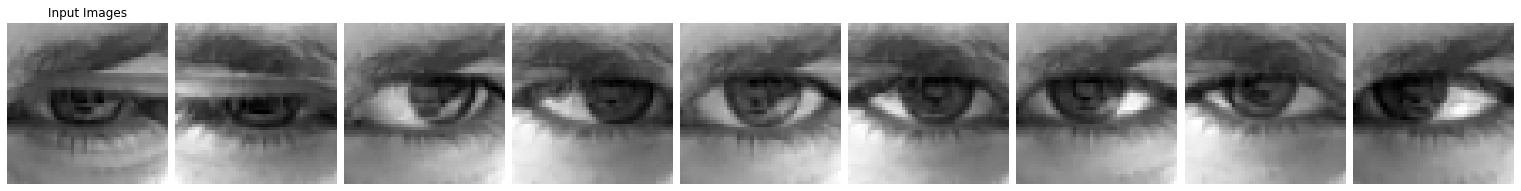

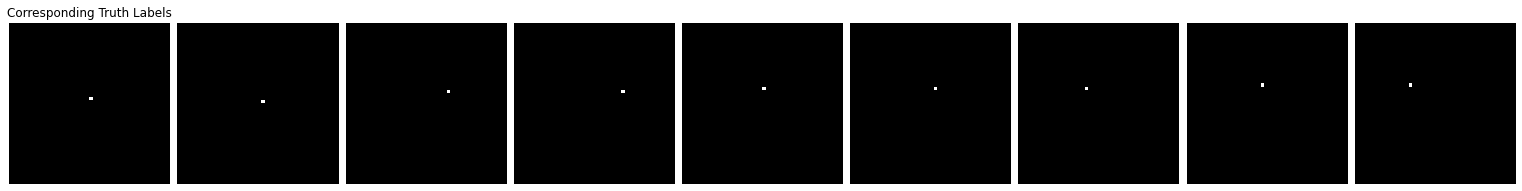

In [22]:
X_cnn = []
y_cnn = []


for d in data.values():
    # Normalize images (divide by 255)
    d[GRAYSCALE_KEY] = d[GRAYSCALE_KEY]/255
    left_eye_external = d[ANNOTATION_KEY][0]
    left_eye_iris = d[ANNOTATION_KEY][1]
    left_eye_internal = d[ANNOTATION_KEY][2]  
    # Crop eye regions (and resize if needed) to be (48x48) image with the help of eye corners. Do that
    # for all images.
    left_lx = int(min(left_eye_external[0], left_eye_internal[0]))
    left_hx = int(max(left_eye_external[0], left_eye_internal[0]))
    left_height = abs(left_eye_external[1] - left_eye_internal[1])/2+min(left_eye_external[1], left_eye_internal[1])
    left_ly = int(left_height-(left_hx-left_lx)/2)
    left_hy = int(left_height+(left_hx-left_lx)/2)
    left_shifted_iris = [left_eye_iris[0]-left_lx,left_eye_iris[1]-left_ly]
    left_eye = d[GRAYSCALE_KEY][left_ly:left_hy,left_lx:left_hx].copy()
    left_shifted_iris[0]=int(48 * left_shifted_iris[0]/left_eye.shape[0])
    left_shifted_iris[1]=int(48 * left_shifted_iris[1]/left_eye.shape[1])
    left_eye = cv2.resize(left_eye,(48,48),interpolation=cv2.INTER_AREA)
    # X contains (48x48) images of eye regions which you crop on previous step
    X_cnn.append(left_eye)
    img = np.zeros((48,48))
    drawGray_Circle(left_shifted_iris,img,color=1,offset=0)
    # Your labels (Y) are coordinates of eye center for each image in X 
    # (don't forget to convert iris center from whole image coordinate system to coordinate system of eye region).
    # You should make one more step to cook Y set. For each eye center in Y you should create a (48x48) image (with zero values)
    # and assign value=1 to pixel which coordinate is an iris center. Do it for all images.
    y_cnn.append(img)
    
    # The same steps for right eye on the same image.
    right_eye_internal = d[ANNOTATION_KEY][3]
    right_eye_iris = d[ANNOTATION_KEY][4]
    right_eye_external = d[ANNOTATION_KEY][5]
    right_lx = int(min(right_eye_external[0], right_eye_internal[0]))
    right_hx = int(max(right_eye_external[0], right_eye_internal[0]))
    right_height = abs(right_eye_external[1] - right_eye_internal[1])/2+min(right_eye_external[1], right_eye_internal[1])
    right_ly = int(right_height-(right_hx-right_lx)/2)
    right_hy = int(right_height+(right_hx-right_lx)/2)
    # right_height = abs(right_hx - right_lx)
    # right_ly = int(right_eye_iris[1]-right_height/2)
    # right_hy = int(right_eye_iris[1]+right_height/2)
    right_shifted_iris = [right_eye_iris[0]-right_lx,right_eye_iris[1]-right_ly]
    right_eye = d[GRAYSCALE_KEY][right_ly:right_hy,right_lx:right_hx].copy()
    right_shifted_iris[0]=int(48 * right_shifted_iris[0]/right_eye.shape[0])
    right_shifted_iris[1]=int(48 * right_shifted_iris[1]/right_eye.shape[1])
    right_eye = cv2.resize(right_eye,(48,48),interpolation=cv2.INTER_AREA)
    X_cnn.append(right_eye)
    img = np.zeros((48,48))
    drawGray_Circle(right_shifted_iris,img,color=1,offset=0)
    y_cnn.append(img)
X_cnn = np.array(X_cnn)
y_cnn = np.array(y_cnn)
# Split the dataset
from sklearn.model_selection import train_test_split
x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn,y_cnn,test_size=0.2,random_state=0)
    
plotImages(X_cnn[:9],'Input Images')
plotImages(y_cnn[:9],'Corresponding Truth Labels')


## 4.2 Build a CNN model using Keras. Layers that might be helpful: Conv2, Conv2DTranspose, concatenate.(20%)

(None, 48, 48, 1)
(None, 48, 48, 64)
(None, 24, 24, 128)
(None, 12, 12, 256)
(None, 48, 48, 128)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 64)   640         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 24, 24, 128)  73856       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 12, 12, 256)  295168      ['conv2d_1[0][0]']             

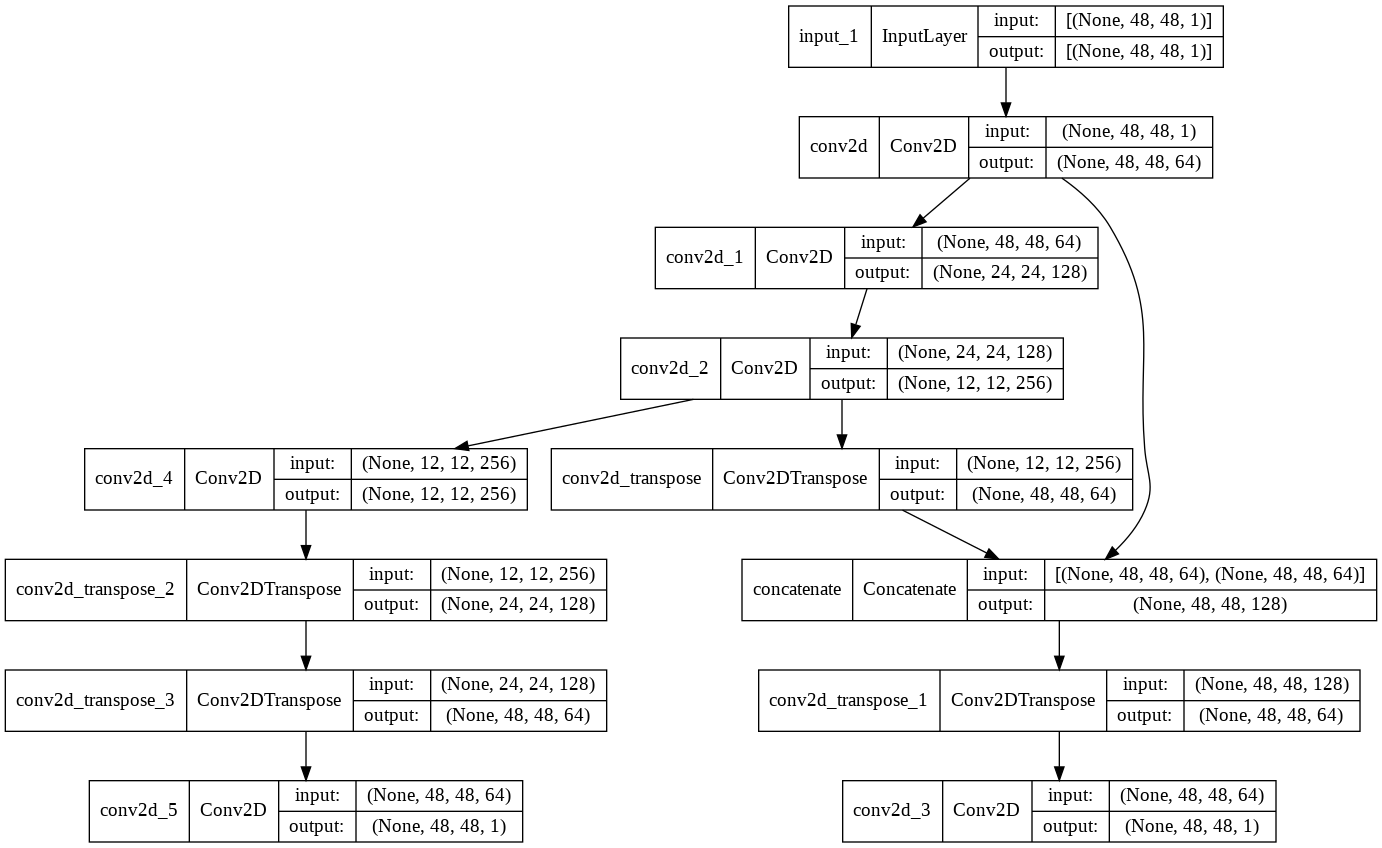

In [6]:
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,concatenate,MaxPooling2D,BatchNormalization
from tensorflow.keras import Input, Model


# CNN Layers
def makeModel(activation,loss,optimizer,name):
    
 

    input_layer = Input(shape=(48,48,1))

    x1 = Conv2D(filters=64, padding='same', kernel_size=(3,3), activation=activation)(input_layer)
    x2 = Conv2D(filters=128, padding='same', kernel_size=(3,3), strides=(2,2), activation=activation)(x1)
    x3 = Conv2D(filters=128, padding='same', kernel_size=(3,3), strides=(2,2), activation=activation)(x2)
    x4 = Conv2DTranspose(filters=64, padding='same', kernel_size=(3,3), strides=(4,4), activation=activation)(x3)
    x5 =  Conv2DTranspose(filters=64, padding='same', kernel_size=(3,3), activation=activation)(x4)
    main_output = Conv2D(filters=1, padding='same', kernel_size=(3,3), activation=activation)(x5)

    aux_x1 = Conv2D(filters=256, padding='same', kernel_size=(3,3), activation=activation)(x3)
    aux_x2 = Conv2DTranspose(filters=128, padding='same', kernel_size=(3,3), strides=(2,2), activation=activation)(aux_x1)
    aux_x3 = Conv2DTranspose(filters=64, padding='same', kernel_size=(3,3), strides=(2,2), activation=activation)(aux_x2)  
    aux_output = Conv2D(filters=1, padding='same', kernel_size=(3,3), activation=activation)(aux_x3)

    model = Model(input_layer,[main_output,aux_output],name=name)


    return model
model = makeModel('tanh','mse','adam','sample')
print(model.summary())
from keras.utils.vis_utils import plot_model

plot_model(model, "model.png", show_shapes=True)

## 4.3 Compile and train CNN with different optimizers [sgd, adam, adamax, rmsprop], loss functions [mse, mae] and activations [tanh, relu, sigmoid]. Report best combination. (20%)

In [9]:
from tensorflow.keras.optimizers import Adam,SGD,Adamax,RMSprop
from tensorflow.python.client import device_lib
for device in device_lib.list_local_devices():
  print('Device Type :',device.device_type)
from tensorflow.keras.callbacks import EarlyStopping
models = []
activations = ['tanh','relu','sigmoid']
losses=['mse','mae']
optimizers=['SGD','adam','Adamax','RMSprop']

for opt in optimizers:
  for loss in losses:
    for act in activations:
      print('->Preparing and Training model with hyperparameters:\n\t*Optimizer='+
            opt+'\n\t*Activation function='+act+'\n\t*Loss function='+loss)
      model = makeModel(activation=act,loss=loss,optimizer=opt,name=opt+'_'+act+'_'+loss)
      # early_stopping = EarlyStopping(monitor='accuracy', patience=100, restore_best_weights=True)
      model.fit(x_train_cnn, [y_train_cnn, x_train_cnn],
                batch_size=10,
                epochs=10,
                verbose=3,
                )
      accuracy = model.evaluate(x_train_cnn, [y_train_cnn, x_train_cnn])
      print('\t--$ Accuracy=',accuracy)
      models.append(model)
  break

Device Type : CPU
Device Type : GPU
->Preparing and Training model with hyperparameters:
	*Optimizer=adam
	*Activation function=tanh
	*Loss function=mae
(None, 48, 48, 1)
(None, 48, 48, 64)
(None, 24, 24, 128)
(None, 12, 12, 256)
(None, 48, 48, 128)
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
62/62 [==============================] - 2s 31ms/step - loss: 0.0112 - conv2d_27_loss: 7.4805e-04 - conv2d_29_loss: 0.0104 - conv2d_27_accuracy: 0.9996 - conv2d_29_accuracy: 6.6520e-05
	--$ Accuracy= [0.011166193522512913, 0.0007480495260097086, 0.010418145917356014, 0.9995661973953247, 6.652018782915547e-05]


Best Hyperparameter results after checking different models are **adam** optimiser, with **relu** activation function and **mse** loss function.

In [10]:
model = makeModel(activation='relu',loss='mse',optimizer='adam',name='finetuned_model')
model.fit(x_train_cnn, [y_train_cnn, x_train_cnn],
          batch_size=10,
          epochs=30
          )



(None, 48, 48, 1)
(None, 48, 48, 64)
(None, 24, 24, 128)
(None, 12, 12, 256)
(None, 48, 48, 128)
Epoch 1/30
198/198 [==============================] - 40s 34ms/step - loss: 0.0075 - conv2d_33_loss: 4.3419e-04 - conv2d_35_loss: 0.0071 - conv2d_33_accuracy: 0.9996 - conv2d_35_accuracy: 6.5862e-05
Epoch 2/30
198/198 [==============================] - 7s 34ms/step - loss: 7.5505e-04 - conv2d_33_loss: 4.3403e-04 - conv2d_35_loss: 3.2103e-04 - conv2d_33_accuracy: 0.9996 - conv2d_35_accuracy: 6.6520e-05
Epoch 3/30
198/198 [==============================] - 7s 33ms/step - loss: 6.4300e-04 - conv2d_33_loss: 4.3403e-04 - conv2d_35_loss: 2.0897e-04 - conv2d_33_accuracy: 0.9996 - conv2d_35_accuracy: 6.6520e-05
Epoch 4/30
198/198 [==============================] - 7s 33ms/step - loss: 7.5049e-04 - conv2d_33_loss: 4.3403e-04 - conv2d_35_loss: 3.1646e-04 - conv2d_33_accuracy: 0.9996 - conv2d_35_accuracy: 6.6520e-05
Epoch 5/30
198/198 [==============================] - 7s 34ms/step - loss: 6.1218e-04 

## 4.4  Make a prediction for 10 test images. Draw predicted centers on them and visualize it. 


Truth Labels


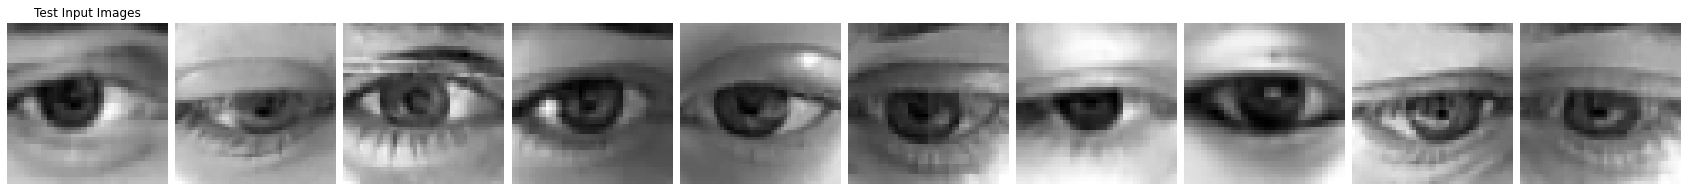

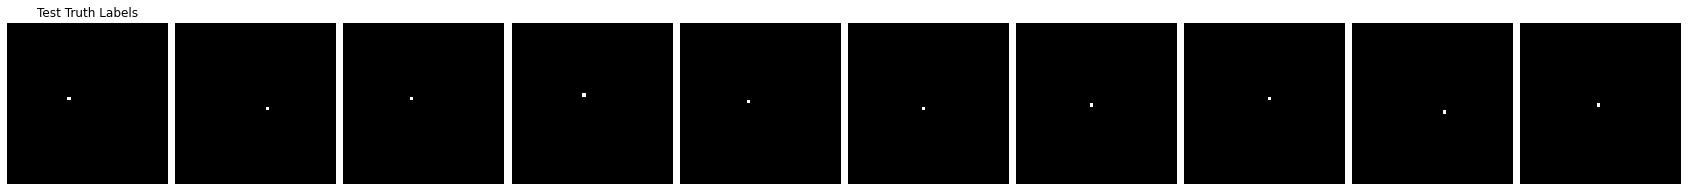


Model Predictions



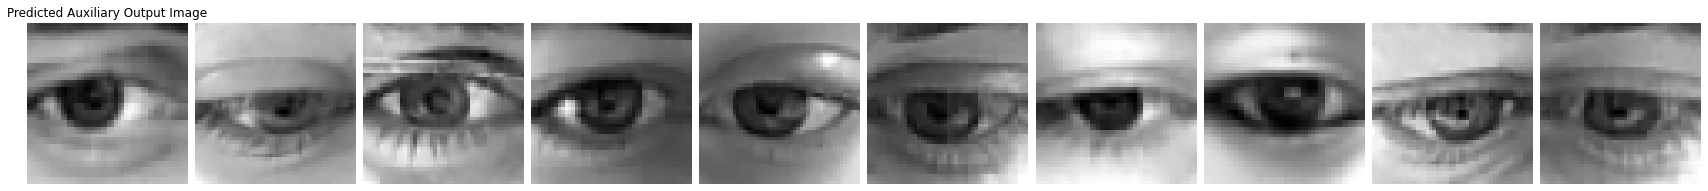

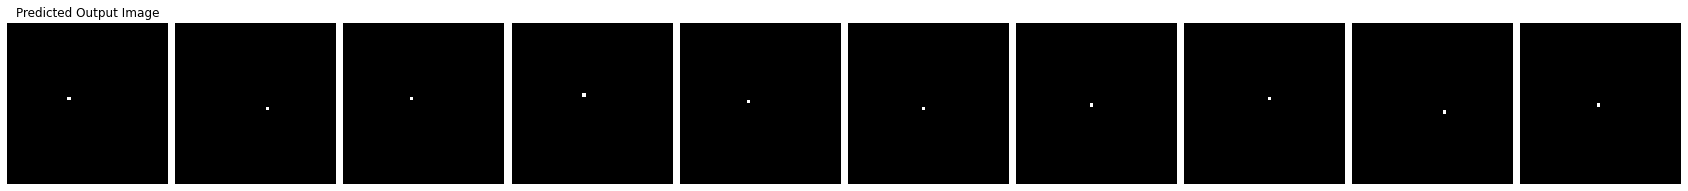

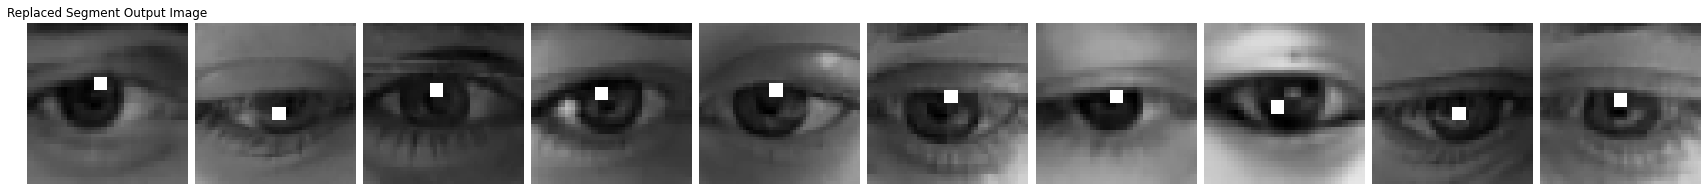

In [33]:
y_pred_cnn = model.predict(x_test_cnn)
print('Truth Labels')
plotImages(x_test_cnn[:10],'Test Input Images')
plotImages(y_test_cnn[:10],'Test Truth Labels')
print('\nModel Predictions\n')
plotImages(y_pred_cnn[1][:10].reshape(10,48,48),'Predicted Auxiliary Output Image')
plotImages(y_pred_cnn[0][:10].reshape(10,48,48),'Predicted Output Image')
for aux,seg in zip(y_pred_cnn[1],y_pred_cnn[0]):
  center_pred = np.unravel_index(np.argmax(seg, axis=None), seg.shape)
  drawGray_Circle(center_pred,aux,color=1,offset=2)
  
plotImages(y_pred_cnn[1][:10].reshape(10,48,48),'Replaced Segment Output Image')

# 5 Bonus on GAN

## Face Generation

In this bonus task, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The notebook will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

#### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

#### Pre-processed Data

Since the task's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-face-generation/assets/processed_face_data.png?raw=1' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that will be extracted in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [ ]:
# can comment out after executing
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip
!unzip "/content/processed-celeba-small.zip" -d "/content/processed_celeba_small"

In [ ]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

#### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

##### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

##### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [ ]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [ ]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    
    # TODO: Implement function and return a dataloader
    
    return None


### Create a DataLoader

##### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [ ]:
# Define function hyperparameters
batch_size = 
img_size = 

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


*Next*, we can view some images! You should seen square images of somewhat-centered faces.


In [ ]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img.reshape((32,32,3)))

# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

##### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [ ]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    # Note, it is not doable with Sklearn scalers.
    # It should be done manually with 2 or 3 lines of code.
    
    return x


In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())


## Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

### Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(conv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)

class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()

        # complete init function
        # 3 (convultional layer + batch normalization layer)'s => should be enough
        # Make use of the conv function defined for you above.
        # You should also define a fully-connected layer here.
        # Write 4 or 5 lines here
        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        # Use the defined conv layers and the fc layer here.
        # Write 4-6 lines here
        
        return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

### Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

##### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [ ]:
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    # create a sequence of transpose + optional batch norm layers
    layers = []
    transpose_conv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                                              kernel_size, stride, padding, bias=False)
    # append transpose convolutional layer
    layers.append(transpose_conv_layer)
    
    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
        
    return nn.Sequential(*layers)

class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()
        
        # complete init function
        # 3 (convultional transpose layer + batch normalization layer)'s => should be enough
        # Dont put batch normalization after the last deconv layer.
        # Make use of the deconv function defined for you above.
        # You should also define a fully-connected layer here.
        # This function should be the mirrored functionality of the discriminator.
        # Write 4 or 5 lines here

        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        
        return x

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

### Initialize the weights of your networks

To help your models converge, we will initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.



In [ ]:
from torch.nn import init

def weights_init_normal(m):
  classname = m.__class__.__name__
  if hasattr(m, 'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1 or classname.find('Conv2d') != -1 or classname.find('ConvTranspose2d') != -1):
    init.normal_(m.weight.data, 0.0, 0.02)        
  if hasattr(m, 'bias') and m.bias is not None:
    init.constant_(m.bias.data, 0.0)
    
    

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL.
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [ ]:
# Define model hyperparams
d_conv_dim = 
g_conv_dim = 
z_size = 

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [ ]:
def real_loss(D_out):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    loss = 
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    loss = 
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [ ]:
import torch.optim as optim

# Create optimizers for the discriminator D and generator G
d_optimizer = 
g_optimizer = 

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [ ]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            # 1. Train the discriminator on real and fake images
            d_loss = 

            # 2. Train the generator with an adversarial loss
            g_loss = 
            
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [ ]:
# set number of epochs 
n_epochs = 


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

In [ ]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [ ]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [ ]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

In [ ]:
_ = view_samples(-1, samples)